#### Named Entity Recognition

In [ ]:
#!pip install spacy
#!pip install wordcloud

In [ ]:
###Execute below command through anaconda command prompt
#!python -m spacy download en


In [6]:
import numpy as np # linear algebra4
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [7]:
#import pandas
book=pd.read_csv("https://raw.githubusercontent.com/mchandak/DS_Repo10/main/apple.txt",on_bad_lines ='skip')

In [8]:
book.head()

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""


In [9]:
book1 = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book2 = [x for x in book1 if x] # removes empty strings, because they are considered in Python as False
book2[0:2]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [10]:
text = ' '.join(book2[0:2])
text

"It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working

In [4]:
text1 = "European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices."


In [11]:
##Entity Tagging
nlp = spacy.load('en_core_web_sm')
#one_block = "India is exporting $10 million Software to USA. Software is one of the most growing sector in exporting services"
one_block = text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [12]:
nlp1 = spacy.load("en_core_web_sm")
for val in nlp1.get_pipe("ner").labels:
    print(val , ' : ' ,spacy.explain(val))

CARDINAL  :  Numerals that do not fall under another type
DATE  :  Absolute or relative dates or periods
EVENT  :  Named hurricanes, battles, wars, sports events, etc.
FAC  :  Buildings, airports, highways, bridges, etc.
GPE  :  Countries, cities, states
LANGUAGE  :  Any named language
LAW  :  Named documents made into laws.
LOC  :  Non-GPE locations, mountain ranges, bodies of water
MONEY  :  Monetary values, including unit
NORP  :  Nationalities or religious or political groups
ORDINAL  :  "first", "second", etc.
ORG  :  Companies, agencies, institutions, etc.
PERCENT  :  Percentage, including "%"
PERSON  :  People, including fictional
PRODUCT  :  Objects, vehicles, foods, etc. (not services)
QUANTITY  :  Measurements, as of weight or distance
TIME  :  Times smaller than a day
WORK_OF_ART  :  Titles of books, songs, etc.


In [13]:
for token in doc_block[0:20]:
    print(token, ':', token.pos_)

It : PRON
's : AUX
amazing : ADJ
..... : PUNCT
battery : NOUN
last : ADJ
around : ADP
10 : NUM
-12 : NOUN
hrs : NUM
..... : PUNCT
best : ADJ
laptop : NOUN
for : ADP
students : NOUN
and : CCONJ
coders : VERB
Finally : ADV
a : DET
MacBook : PROPN


In [14]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['battery', '-12', 'laptop', 'students', 'coders', 'possession', 'Got', '50k', 'sale', 'laptop', 'News.luxury', 'product', 'niche', 'technology', 'battery', 'life', 'machine', 'laptops', 'crash', 'become', 'years', '-', 'virus', 'required', 'security', 'data', 'transactions', 'sense', 'possession', 'pride', 'Problems', 'switching', 'windows', 'based', 'system', 'space', 'disk', 'CD', 'drive', 'inability', 'transfer', 'data', 'existing', 'disc', 'format', 'apps', 'paid', 're', 'apps', 'play', 'store', 'bird', 'costs', 'Rs', 'printers', 'laser', 'printer', 'used', 'compatibility', 'issues', 'powerpoint', 'master', 'working', 'document', 'slides', 'open', 'environment', 'have', 'distortion', 'issues', 'need', 'spend', 'CD', 'writer', 'buy', 'carry', 'bag', 'connected', 'projectors', 'buy', 'connectors', 's', 'clarity', 'one', 'buy', 'connect', 'TV', 'ports', 's', 'clarity', 'customer', 'support', 'manuals', 'help', 'section', 'Marketing', 'strategy', 'market', 'planned', 'issues', 'mentio

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

### Emotion Mining

In [2]:
#Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/mchandak/DS_Repo10/main/Data/Afinn.csv', sep=',', encoding='latin-1')
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ManojC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book2))
sentences[0:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!']

In [12]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [14]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [16]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [17]:
# test that it works
calculate_sentiment(text = 'Unhappy')

Unhappy


-2

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df.head()


It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working

After using Windows Operating system for the past 10+ years, I switched to Mac.
The switch was inspired by the awesome reviews I got from my friends.
I must say that they were all real and that the device and the tech is so very impressive.
Be it the design,  be it the processing speed, be it the battery life......all are way ahead than that of a Windows device.
I am satisfied to get the marvel of a tech in my hands.
It is saving my time every now and then as I am stricken with an idea to pen a couplet, short story or poem.....I simply open the lid, note the idea and then simply close it....no need of shutting the OS down everytime.
Working perfectly.
MacBook Air is excellent.
The build is super strong, the operating systems runs smooth.
The trackpad and keyboard are great.
The only thing that can be improved is its screen (the visuals).
Not as good as expected.
The hard disk is too small but if you carry an external hard disk you can solve that problem.
Got it at the price of a Dell W

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11


In [20]:
sent_df.head()

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11


In [21]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [22]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
45,Now my mac is perfectly fine : Got the Apple M...,5,27
46,Ships with macOS sierra but update is availabl...,6,86
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7,43
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [23]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.935829
std        3.388175
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [24]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [25]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!'

In [26]:
sent_df['index']=range(0,len(sent_df))

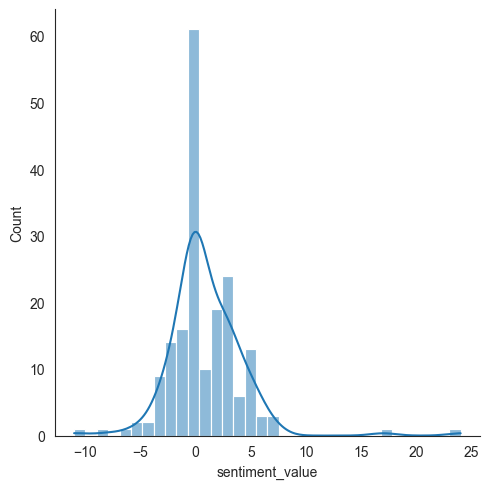

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot: xlabel='index', ylabel='sentiment_value'>

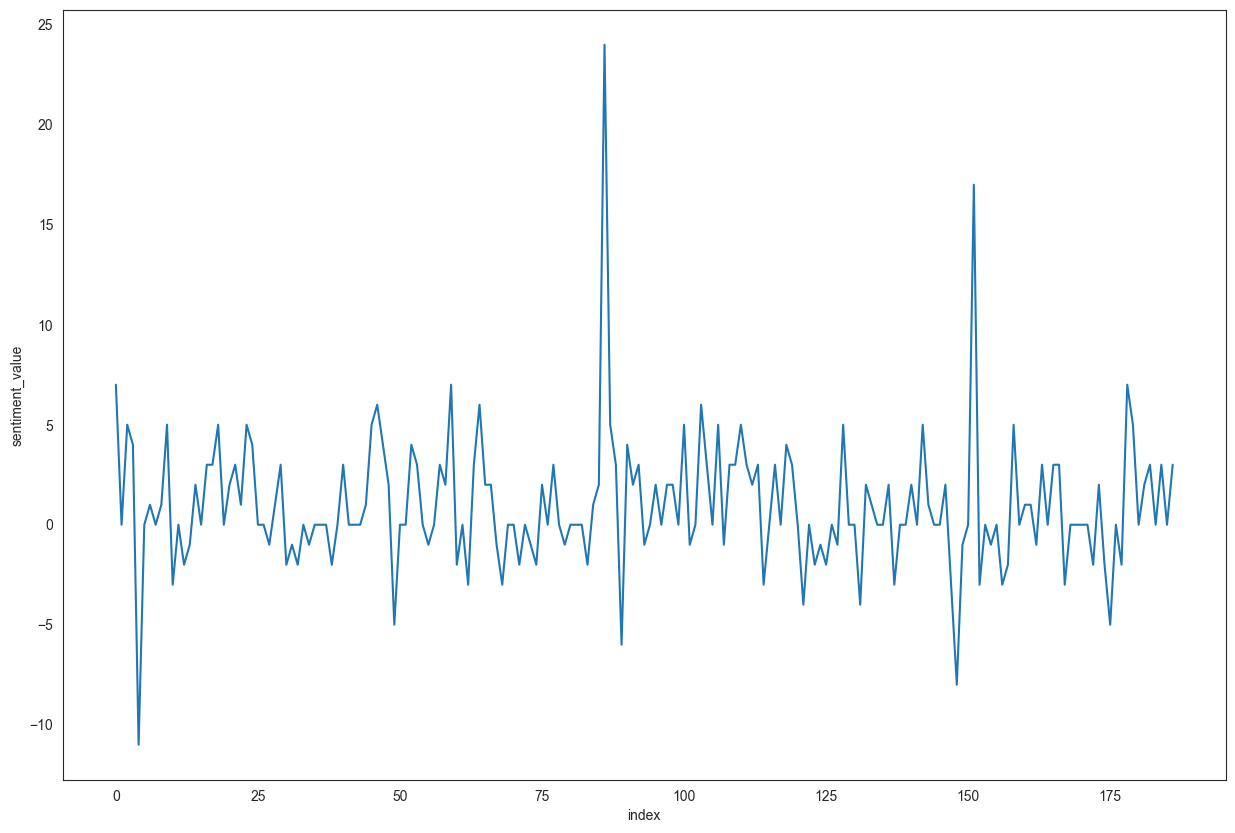

In [28]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

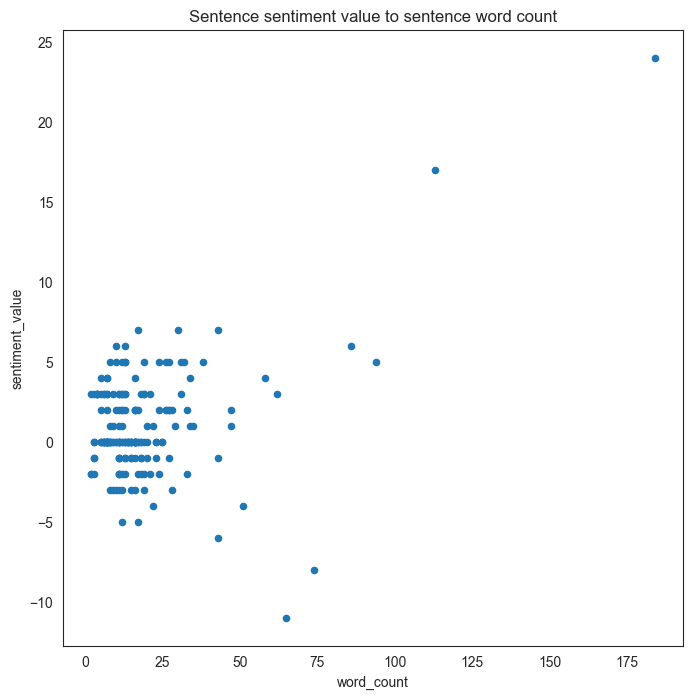

In [29]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

<h1><center> ꧁༺ȶɦǟռӄ ʏօʊ༻꧂